In [42]:
import requests
import re
import numpy as np
import os
from bs4 import BeautifulSoup
import pandas as pd
from io import BytesIO
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from datetime import datetime
import matplotlib.pyplot as plt
headers = {"user-agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"}

## Image downloading to local disk

In [41]:
def download_image(url,folder_path,class_):
    file_path=""
    try:
        
        folder_path = os.path.join(folder_path,class_)
        common_image_value = "608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-"
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
        response = requests.get(url)
        if response.status_code==200:

            filename = url.split('/')[-1].replace(common_image_value,"")
            
            # Combina el folder_path con el filename
            file_path = os.path.join( folder_path,filename)

            # Abre un archivo binario para escribir
            with open(file_path, 'wb') as f:
                f.write(response.content)
    except:
        print(f"No se pudo guardar la imagen {url} de clase {class_}")  
    return file_path

In [45]:
path_folder = "to_predict"
url= "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-kacb12c6j-1701355912147.jpg"
#url = "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-jil25a1gj-1701226734118.jpg"
download_single_image = download_image(url,path_folder,"Test")

## Imagenes controles DataFrame

This dataset has pictures about safety and quality controls taken in Edenor, Buenos Aires Argentina 

The dataset includes images url and their tagged class.

In [44]:
imagenes_controles_df = pd.read_csv('Imagenes controles etiquetados.csv')
imagenes_controles_df.head()

,uri,tag,Vallado_,ID,Creado,Confirma_etiqueta
0,https://field.voolks.com/api/containers/field-...,NaN,0,5899,23/5/2024,0
1,https://field.voolks.com/api/containers/field-...,NaN,1,5900,23/5/2024,0
2,https://field.voolks.com/api/containers/field-...,NaN,0,5901,23/5/2024,0
3,https://field.voolks.com/api/containers/field-...,NaN,0,5902,23/5/2024,0
4,https://field.voolks.com/api/containers/field-...,NaN,1,5903,23/5/2024,0


## Downloading the image into a tensor

## Setting the classes

In [45]:
classes = {
    1 : "Vallado",
    0 : "No vallado"
}

## Importing all the images

In [23]:
path = "dataset_a_validar"
tiempo_inicial = datetime.now()
X_dataset=[]
y_dataset = []
next_start = 11370
for index, url in enumerate(imagenes_controles_df['uri'][next_start:]):
    class_number = imagenes_controles_df['Vallado_'][index+next_start]
    x_train = download_image(url,path,classes[class_number]
                             )
    if (index%10==0 ):
        tiempo_temp = datetime.now()
        print(f"Imagenes cargadas: {index + next_start}" )
        print(f"Tiempo de carga:{tiempo_temp - tiempo_inicial}")
        print(f"Image: {x_train}")
#X_dataset = [download_image(url) for url in imagenes_controles_df['uri']][10000:15000]
#y_dataset = imagenes_controles_df['Vallado_'][10000:15000]
tiempo_final = datetime.now()

tiempo_procesamiento = tiempo_final-tiempo_inicial
print(f"Tiempo de procesamiento: {tiempo_procesamiento}")

Imagenes cargadas: 11370
Tiempo de carga:0:00:02.840940
Image: dataset_a_validar/Vallado/kacb12c6j-1657557180848.jpg
Imagenes cargadas: 11380
Tiempo de carga:0:00:23.598507
Image: dataset_a_validar/No vallado/kacb12c6j-1657293691222.jpg
Imagenes cargadas: 11390
Tiempo de carga:0:00:51.655954
Image: dataset_a_validar/No vallado/jil25a1gj-1657289799854.jpg
Imagenes cargadas: 11400
Tiempo de carga:0:02:16.763567
Image: dataset_a_validar/Vallado/kacb12c6j-1657205096382.jpg
Imagenes cargadas: 11410
Tiempo de carga:0:03:47.575142
Image: dataset_a_validar/Vallado/jil25a1gj-1657201770362.jpg
Imagenes cargadas: 11420
Tiempo de carga:0:04:15.471977
Image: dataset_a_validar/Vallado/jil25a1gj-1657126756648.jpg
Imagenes cargadas: 11430
Tiempo de carga:0:04:44.609492
Image: dataset_a_validar/No vallado/jil25a1gj-1657036677342.jpg
Imagenes cargadas: 11440
Tiempo de carga:0:05:23.852759
Image: dataset_a_validar/Vallado/kacb12c6j-1657028820576.jpg
Imagenes cargadas: 11450
Tiempo de carga:0:06:11.373141

9450 images in 9:04:48.749774

9450 - 11310  images in 5:32:00.648129

11310 - 11370 Tiempo de carga: 0:02:14.090066

## Creating the dataset and splitting into Training and Validation Sets

In [46]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = "dataset/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

Found 15371 files belonging to 2 classes.
Using 12297 files for training.
Found 15371 files belonging to 2 classes.
Using 3074 files for validation.


## Picking the images and its classes

2024-05-29 10:50:30.589229: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


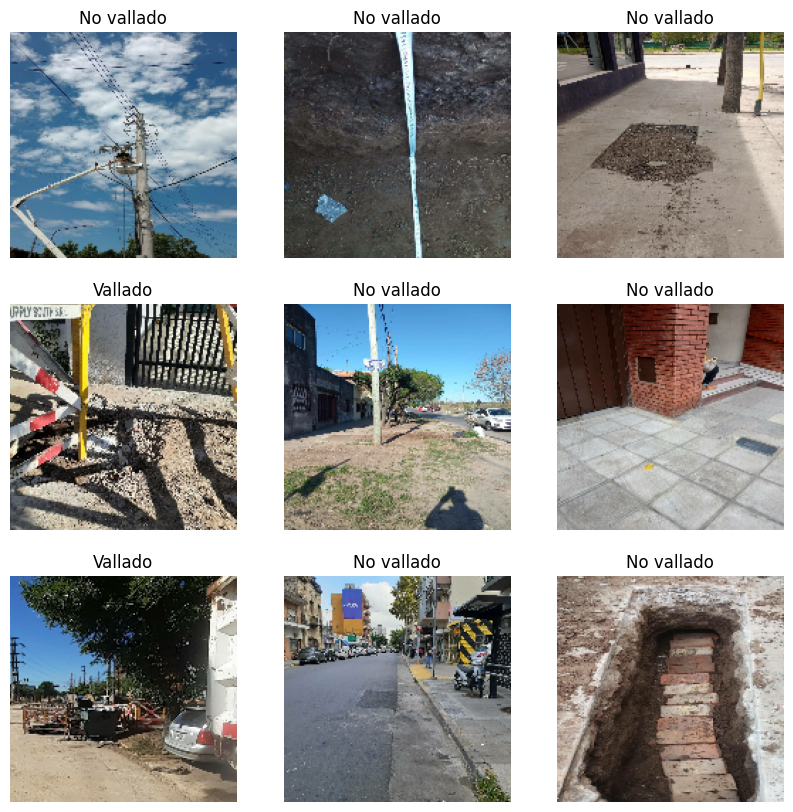

In [48]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Preprocess and Augment Training Data

In [49]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [50]:
def data_augmenter():

    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.05))
 
    return data_augmentation

## Watching the image and image augmentation

2024-05-29 10:50:36.814945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


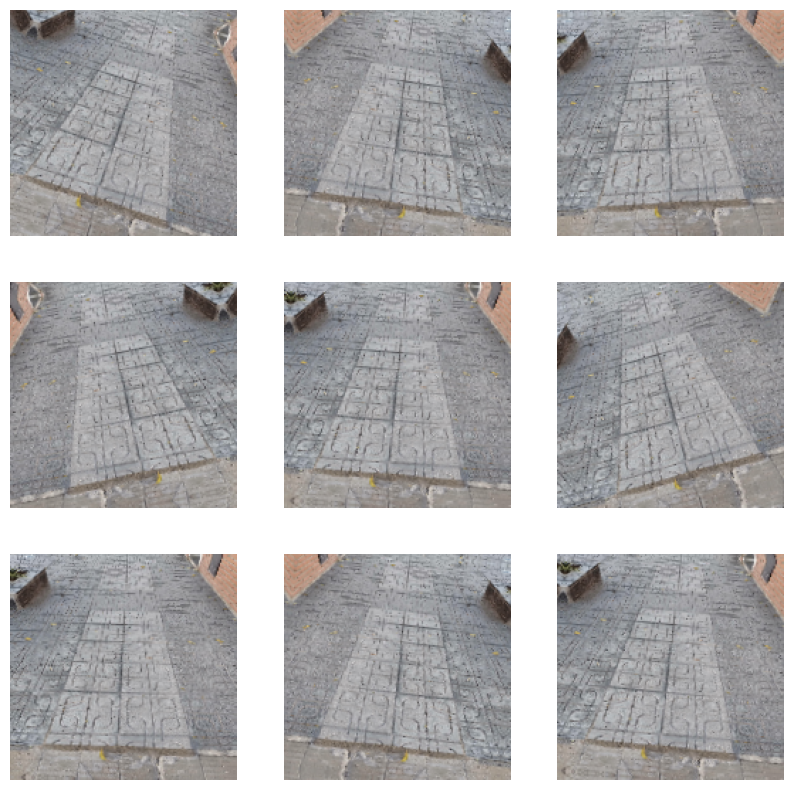

In [51]:
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

# Using MobileNetV2 for Transfer Learning

In [52]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [53]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

In [ ]:
base_model.summary()

Let's choose the first batch from the tensorflow dataset to run this images through the MobileNetV2 base model, and test out the predictions made on some of the images

In [55]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 1000)


In [56]:
#Shows the different label probabilities in one tensor 
label_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int32)>

Decoding the predictions made by the model

In [57]:
base_model.trainable = False
image_var = tf.Variable(preprocess_input(image_batch))
pred = base_model(image_var)

tf.keras.applications.mobilenet_v2.decode_predictions(pred.numpy(), top=2)

[[('n04204347', 'shopping_cart', 0.31856307),
  ('n04467665', 'trailer_truck', 0.10509254)],
 [('n04326547', 'stone_wall', 0.09629561),
  ('n03930313', 'picket_fence', 0.094899796)],
 [('n04208210', 'shovel', 0.51063013), ('n04355338', 'sundial', 0.1699995)],
 [('n04604644', 'worm_fence', 0.23633176), ('n04606251', 'wreck', 0.15753724)],
 [('n02879718', 'bow', 0.09494), ('n04553703', 'washbasin', 0.053753756)],
 [('n03804744', 'nail', 0.16347387), ('n04141327', 'scabbard', 0.08425642)],
 [('n04141327', 'scabbard', 0.25045043), ('n03498962', 'hatchet', 0.10897111)],
 [('n04523525', 'vault', 0.6716375), ('n03743016', 'megalith', 0.04139196)],
 [('n02894605', 'breakwater', 0.55624473),
  ('n04326547', 'stone_wall', 0.09179094)],
 [('n09246464', 'cliff', 0.26949692),
  ('n03042490', 'cliff_dwelling', 0.22143012)],
 [('n02797295', 'barrow', 0.109343596), ('n03160309', 'dam', 0.104313605)],
 [('n03127925', 'crate', 0.4140263),
  ('n03874293', 'paddlewheel', 0.027368387)],
 [('n04604644', 'wo

Of course they make no sense, because our class it's not included in the classification model

## Layer Freezing with the Functional API
We are going to use the pretrained model and modify the classifier task.

In [59]:
# UNQ_C2
# GRADED FUNCTION
def vallado_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):

    input_shape = image_shape + (3,)

    base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                                   include_top=False, # <== Important!!!!
                                                   weights='imagenet') # From imageNet
    base_model.trainable = False 
    inputs = tf.keras.Input(shape=input_shape) 

    x = data_augmentation(inputs)
    x = preprocess_input(x)

    x = base_model(x, training=False) 
    
    x = tf.keras.layers.GlobalAveragePooling2D()(x) 

    x = tf.keras.layers.Dropout(rate=0.2)(x)
        
    outputs = tf.keras.layers.Dense(1,activation='linear')(x)
    
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [60]:
model2 = vallado_model(IMG_SIZE, data_augmentation)

In [61]:
base_learning_rate = 0.001
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
initial_epochs = 5
history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 106s 269ms/step - accuracy: 0.8505 - loss: 0.3260 - val_accuracy: 0.9359 - val_loss: 0.1844
Epoch 2/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 112s 290ms/step - accuracy: 0.9235 - loss: 0.1911 - val_accuracy: 0.9369 - val_loss: 0.1739
Epoch 3/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 108s 280ms/step - accuracy: 0.9279 - loss: 0.1801 - val_accuracy: 0.9366 - val_loss: 0.1646
Epoch 4/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 107s 277ms/step - accuracy: 0.9301 - loss: 0.1729 - val_accuracy: 0.9356 - val_loss: 0.1632
Epoch 5/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 101s 262ms/step - accuracy: 0.9302 - loss: 0.1715 - val_accuracy: 0.9388 - val_loss: 0.1594


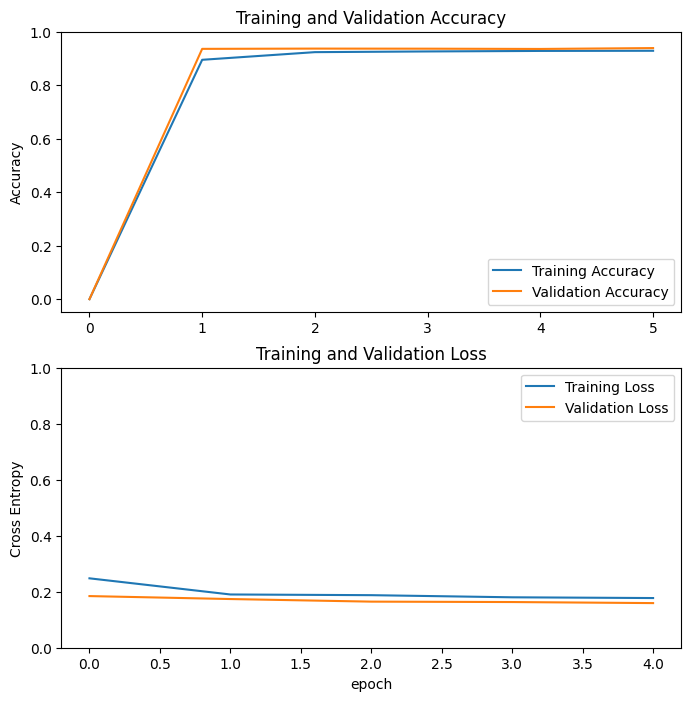

In [63]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [64]:
class_names

['No vallado', 'Vallado']

## Fine-tunning the Model
We could try fine-tuning the model by re-running the optimizer in the last layers to improve accuracy.

In [65]:
# UNQ_C3
base_model = model2.layers[2]
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120

### START CODE HERE

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
    
# Define a BinaryCrossentropy loss function. Use from_logits=True
loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=True)
# Define an Adam optimizer with a learning rate of 0.1 * base_learning_rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1*base_learning_rate)
# Use accuracy as evaluation metric
metrics=['accuracy']

### END CODE HERE

model2.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

Number of layers in the base model:  154


In [66]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model2.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 126s 316ms/step - accuracy: 0.9195 - loss: 0.2120 - val_accuracy: 0.9362 - val_loss: 0.1998
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 128s 331ms/step - accuracy: 0.9536 - loss: 0.1263 - val_accuracy: 0.9535 - val_loss: 0.1474
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 122s 316ms/step - accuracy: 0.9628 - loss: 0.0978 - val_accuracy: 0.9493 - val_loss: 0.1633
Epoch 8/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 116s 301ms/step - accuracy: 0.9668 - loss: 0.0838 - val_accuracy: 0.9281 - val_loss: 0.1948
Epoch 9/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 116s 301ms/step - accuracy: 0.9740 - loss: 0.0639 - val_accuracy: 0.9167 - val_loss: 0.2540
Epoch 10/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 116s 301ms/step - accuracy: 0.9788 - loss: 0.0541 - val_accuracy: 0.9216 - val_loss: 0.2347


In [67]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

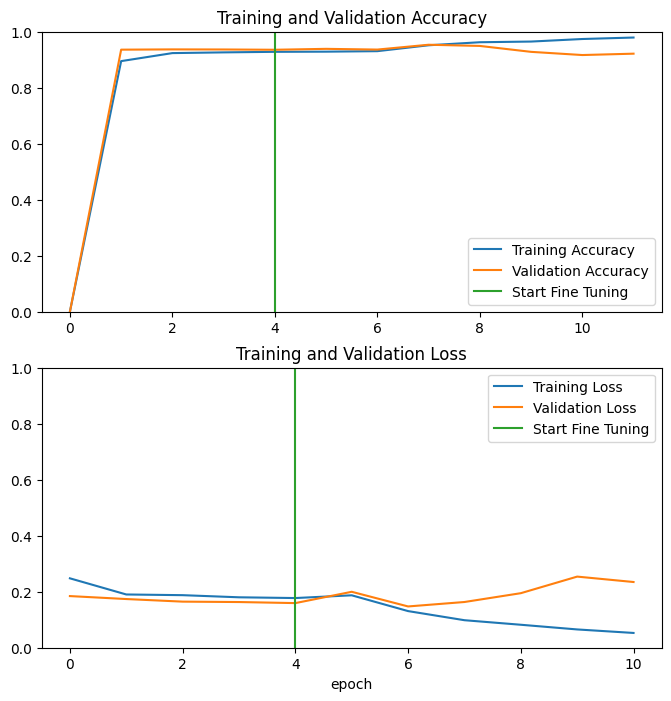

In [68]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [69]:
def predict_and_decode(img_path, model, class_names):
    img = image.load_img(img_path, target_size=(160, 160))  # Asegúrate de que sea el mismo tamaño que el entrenamiento
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Convertir a un lote de tamaño 1
   #img_array = preprocess_input(img_array)  # Preprocesamiento igual que durante el entrenamiento

    predictions = model.predict(img_array)
    pred_class = (predictions > 0).astype(int)  # Umbral a 0 para logits
    class_name = class_names[pred_class[0][0]]  # Obtener el nombre de la clase
    return class_name,predictions

In [74]:
from matplotlib.pyplot import imshow

Foto rowing prueba :1.3773247

In [110]:
img_path ="dataset/Vallado/kacb12c6j-1701371981121.jpg"
#img_path ="dataset/No vallado/ach9xgfbz-1658928112205.jpg"



In [80]:
def download_image(url):
    try:
        response = requests.get(url)
        img = load_img(BytesIO(response.content),target_size=(160,160))
        #img_array = img_to_array(img) 
        #resize_image = img_array /255.0
        return img
    except:
        print("No se pudo realizar el request")
        return None

In [87]:
from tensorflow.keras.preprocessing import image
import numpy as np
from matplotlib.pyplot import imshow


Input image shape: (1, 160, 160, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] =  [[2.5142806]]
Class: Vallado


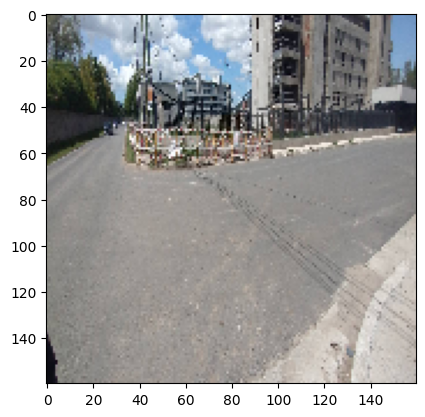

In [111]:
#url= "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.603531ddcedca11b00e6f5e6-photo-kacb12c6j-1701355911684.jpg"
#img = download_image(url)

img = image.load_img(img_path, target_size=(160, 160))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = x/255.0]
x2 = x 
print('Input image shape:', x.shape)
imshow(img)
prediction = model2.predict(x2)
print("Class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ", prediction)
pred_class = (prediction > 1).astype(int)
class_name = class_names[pred_class[0][0]]
print("Class:", class_name)

In [83]:
# Suponiendo que class_names es ['Clase 0', 'Clase 1']
def predict_and_decode2(img_path, model, class_names):
    img = image.load_img(img_path, target_size=(160, 160))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # asegúrate de aplicar el mismo preprocesamiento

    predictions = model.predict(img_array)
    pred_class = (predictions > 0).astype(int)
    class_name = class_names[pred_class[0][0]]
    return class_name, predictions

In [84]:
img_path = 'dataset/No vallado/kacb12c6j-1705498694014.jpg'

In [66]:

img_path ="dataset/Vallado/kacb12c6j-1705603123990.jpg"
model = model2  # Asegúrate de que el modelo está cargado y listo para predecir
predicted_class_name, pred = predict_and_decode(img_path, model, class_names)
predicted_class_name2, pred2 = predict_and_decode2(img_path, model, class_names)
print("Clase sin preprocess_input")
print("La imagen fue clasificada como:", predicted_class_name)
print("Pred ->",pred)
print("Clase con preprocess")
print("La imagen fue clasificada como:", predicted_class_name2)
print("Pred ->",pred2)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Clase sin preprocess_input
La imagen fue clasificada como: Vallado
Pred -> [[5.8300214]]
Clase con preprocess
La imagen fue clasificada como: No vallado
Pred -> [[-7.863274]]


In [29]:
model2.predict(train_dataset.take(1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step


array([[ -2.4874668 ],
       [ 14.129959  ],
       [ -1.7184842 ],
       [ -3.2891755 ],
       [ -7.0236454 ],
       [ 11.383029  ],
       [ 10.287617  ],
       [  2.8117166 ],
       [ -0.02069949],
       [ -5.8107104 ],
       [  7.7978044 ],
       [  5.3914475 ],
       [  6.8140693 ],
       [  7.9700274 ],
       [ 11.550663  ],
       [ -9.10431   ],
       [ -9.639542  ],
       [ -4.8351398 ],
       [-12.048908  ],
       [  8.582828  ],
       [ 14.222345  ],
       [  4.6862717 ],
       [ -9.431898  ],
       [  0.8393942 ],
       [ -3.3423667 ],
       [ -2.534693  ],
       [ -9.936101  ],
       [  7.9720197 ],
       [  6.8210607 ],
       [ -3.8275049 ],
       [ 14.927193  ],
       [ 11.578686  ]], dtype=float32)

In [ ]:
tiempo_inicial = datetime.now()
X_dataset=[]
y_dataset = []
for index, url in enumerate(imagenes_controles_df['uri'][:5]):
    x_train = download_image(url,)
    X_dataset.append(x_train) 
    y_dataset.append(imagenes_controles_df['Vallado_'][index])
    if (index%10==0 ):
        tiempo_temp = datetime.now()
        print(f"Imagenes cargadas: {index}" )
        print(f"Tiempo de carga:{tiempo_temp - tiempo_inicial}")

#X_dataset = [download_image(url) for url in imagenes_controles_df['uri']][10000:15000]
#y_dataset = imagenes_controles_df['Vallado_'][10000:15000]
tiempo_final = datetime.now()

tiempo_procesamiento = tiempo_final-tiempo_inicial
print(f"Tiempo de procesamiento: {tiempo_procesamiento}")

In [ ]:
print(f"X_dataset.shape: {np.array(X_dataset).shape}")
print(f"y_dataset.shape: {np.array(y_dataset).shape}")

X_dataset.shape: (5, 160, 160, 3)
y_dataset.shape: (5,)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_dataset), np.array(y_dataset)))

In [ ]:
for image, _ in train_dataset.take(1):
    print("Original image shape:", image.shape)

Original image shape: (160, 160, 3)


2024-05-27 19:23:36.812215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((X_dataset, y_dataset))

def split_dataset(dataset, train_split=0.8, shuffle=True, shuffle_size=10000):
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=42)
    dataset_size = len(dataset)
    train_size = int(train_split * dataset_size)
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size)
    return train_dataset, val_dataset

train_dataset, validation_dataset = split_dataset(dataset)


BATCH_SIZE = 32
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)




Batch of images shape: (4, 160, 160, 3)
Batch of labels shape: (4,)


2024-05-27 19:29:20.050684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
index_inicial = 0
index_final = 4000
X_train_2000 = []
for index, url in enumerate(imagenes_controles_df['uri'][index_inicial:index_final]):
    x_train = download_image(url)
    X_train_2000.append(x_train) 
    y_train_2000 = imagenes_controles_df['Vallado_'][index_inicial:index_final]
    if (index%100==0 ):
        print(f"Imagene cargadas: {index}" )

Imagene cargadas: 0
No se pudo realizar el request


In [ ]:
X_train_2000

(224, 224, 3)

In [ ]:
tiempo_inicial = datetime.now()

X_dataset = [download_image(url) for url in imagenes_controles_df['uri']][:1000]
y_dataset = imagenes_controles_df['Vallado_'][:1000]
tiempo_final = datetime.now()

tiempo_procesamiento = tiempo_final-tiempo_inicial
print(f"Tiempo de procesamiento: {tiempo_procesamiento}")

In [ ]:

X_dataset

[array([[[0.13333334, 0.1764706 , 0.2       ],
         [0.13333334, 0.1764706 , 0.2       ],
         [0.13333334, 0.1764706 , 0.2       ],
         ...,
         [0.44705883, 0.49803922, 0.5294118 ],
         [0.60784316, 0.6509804 , 0.65882355],
         [0.4       , 0.40392157, 0.4117647 ]],
 
        [[0.12156863, 0.16470589, 0.1882353 ],
         [0.12156863, 0.16470589, 0.1882353 ],
         [0.1254902 , 0.16862746, 0.19215687],
         ...,
         [0.6       , 0.61960787, 0.63529414],
         [0.4509804 , 0.52156866, 0.5686275 ],
         [0.5882353 , 0.6039216 , 0.6156863 ]],
 
        [[0.12941177, 0.17254902, 0.19607843],
         [0.10980392, 0.15294118, 0.1764706 ],
         [0.13333334, 0.1764706 , 0.2       ],
         ...,
         [0.4392157 , 0.4509804 , 0.4862745 ],
         [0.2509804 , 0.3019608 , 0.3372549 ],
         [0.43529412, 0.4862745 , 0.52156866]],
 
        ...,
 
        [[0.6117647 , 0.5568628 , 0.5058824 ],
         [0.6117647 , 0.5568628 , 0.50588

In [ ]:
with h5py.File('vallados_dataset2.hdf5','r') as f:
    X_train_1000_2000 = f['X_train'][:]
    X_test_1000_2000 = f['X_test'][:]
    y_train_1000_2000 = f['y_train'][:]
    y_test_1000_2000 = f['y_test'][:]


In [ ]:
with h5py.File('vallados_dataset2.hdf5','r') as f:
    X_train_2000_3000 = f['X_train'][:]
    X_test_2000_3000 = f['X_test'][:]
    y_train_2000_3000 = f['y_train'][:]
    y_test_2000_3000 = f['y_test'][:]


In [ ]:
y_train_1000.shapes

(1000,)

In [ ]:
X_dataset = [] 
y_dataset = [] 
X_dataset.append(X_train_1000)

X_dataset.append(X_train_2000_3000)


y_dataset.append(y_train_1000)

y_dataset.append(y_train_2000_3000)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_dataset,y_dataset,test_size=0.2,random_state=42,shuffle=True)

## Saving the dataset

In [ ]:
import h5py

with h5py.File('vallados_dataset.hdf5','w') as f:
    f.create_dataset('X_train',data=X_train)
    f.create_dataset('X_test',data=X_test)
    f.create_dataset('y_train',data=y_train)
    f.create_dataset('y_test',data=y_test)


## Loading the dataset

In [ ]:


import h5py
with h5py.File('vallados_dataset.hdf5','r') as f:
    X_dataset = f['X_dataset'][:]
    y_dataset = f['y_dataset'][:]

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'vallados_dataset.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_dataset,y_dataset,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
y_train = y_train.reshape(-1,1)
y_train.shape

(2327, 1)

In [ ]:
X_train.shape

(2327, 224, 224, 3)

## Model

In [ ]:
model = keras.Sequential(
[
    keras.Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])),
    layers.Conv2D(32,2,activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])
print(model.summary())

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 223, 223, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,962,977 (45.64 MB)

 Trainable params: 11,962,977 (45.64 MB)

 Non-trainable params: 0 (0.00 B)

None


## Training the model

In [ ]:
history = model.fit(
    X_train,y_train,
    batch_size = 32,
    epochs = 10,
    verbose= True    
)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 42s 547ms/step - accuracy: 0.6553 - loss: 0.9866
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 562ms/step - accuracy: 0.8307 - loss: 0.3924
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 550ms/step - accuracy: 0.8482 - loss: 0.3334
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 546ms/step - accuracy: 0.9247 - loss: 0.2009
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 546ms/step - accuracy: 0.9584 - loss: 0.1247
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 548ms/step - accuracy: 0.9951 - loss: 0.0275
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 549ms/step - accuracy: 0.9962 - loss: 0.0390
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 544ms/step - accuracy: 0.9942 - loss: 0.0292
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 547ms/step - accuracy: 0.9976 - loss: 0.0143
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 549ms/step - accuracy: 0.9986 - loss: 0.0098


## Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - accuracy: 0.8343 - loss: 0.5406
Test Loss: 0.5459142327308655
Test Accuracy: 0.831615149974823


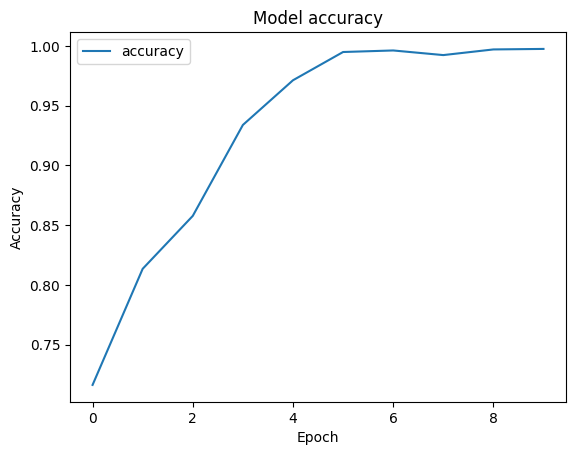

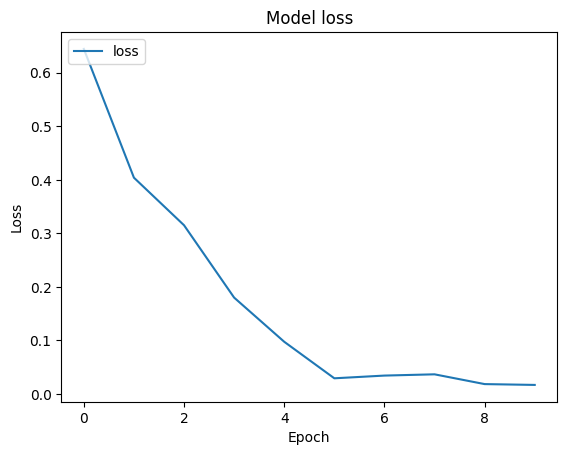

In [ ]:
import matplotlib.pyplot as plt

# Graficar la precisión
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
def load_and_prepare_image(image_path):
    # Descarga y carga la imagen
    img_array = download_image(image_path)
    # Añade una dimensión extra al inicio para crear un batch de tamaño 1
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image(model, image_path):
    # Prepara la imagen
    img_array = load_and_prepare_image(image_path)
    # Realiza la predicción
    predictions = model.predict(img_array)
    # Interpretar los resultados
    predicted_class = (predictions[0][0] > 0.5).astype("int32")
    return predicted_class, predictions[0][0]

# Ejemplo de uso
image_url = "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-jil25a1gj-1693235359644.jpg"
predicted_class, confidence = predict_image(model, image_url)
print("Clase Predicha:", "Vallado" if predicted_class == 1 else "No Vallado")
print("Confianza de la Predicción:", confidence)

NameError: name 'download_image' is not defined

In [ ]:
image_url = "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-jil25a1gj-1692724932767.jpg"
example_false = download_image(image_url)
img_array = np.expand_dims(example_false, axis=0)


In [ ]:
img_array.shape

(1, 224, 224, 3)

In [ ]:
from keras.models import load_model

# Reemplaza 'path_to_my_model.h5' con el path real al archivo .h5
model = load_model('vallado_model.h5')

In [ ]:
image_url = "https://field.voolks.com/api/containers/field-container-bucket/download/608aa366bc79f75644bf4e6b.60351a78cedca11b00e6f5dd-photo-jil25a1gj-1692559353378.jpg"
example_false = download_image(image_url)

img_array = np.expand_dims(example_false, axis=0)

In [ ]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.9912846]], dtype=float32)

In [ ]:
from datetime import datetime

In [ ]:
inicio = datetime.now()
print(inicio)

2024-05-18 22:26:53.296690


In [ ]:
final = datetime.now()
print(final)

2024-05-18 22:28:46.548041


In [ ]:
total = final - inicio
print(total)

0:01:53.251351


In [ ]:
model.save("vallado_model.h5")

In [ ]:
from huggingface_hub import notebook_login

notebook_login()



In [ ]:
from huggingface_hub import upload_file
upload_file("vallado_model.h5","vallado_model.h5",repo_id="vallado_classification")

TypeError: HfApi.upload_file() takes 1 positional argument but 3 positional arguments (and 1 keyword-only argument) were given

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.upload_file(
    path_or_fileobj="vallado_model.h5",    # Path to the file or a file-like object
    path_in_repo="vallado_model.h5",       # Where the file should be stored in the repo
    repo_id="BrunoJaime/vallado_classification" # The repo ID (username/repo_name                 # Optional, set to "dataset" for dataset repos
)

vallado_model.h5:   0%|          | 0.00/144M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/BrunoJaime/vallado_classification/commit/98929e2838d37d5facf4c673d4970da3c68dab20', commit_message='Upload vallado_model.h5 with huggingface_hub', commit_description='', oid='98929e2838d37d5facf4c673d4970da3c68dab20', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    "modelo_mio",
    evaluation_strategy="steps",
    logging_steps=5,
    num_train_epochs=10,
    push_to_hub=True
)

2024-05-19 01:16:25.959752: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-19 01:16:26.255112: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-19 01:16:27.873174: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
trainer = Trainer(
    model = model,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_test,
    compute_metrics='accuracy'
)

AttributeError: 'Sequential' object has no attribute 'to'

In [ ]:
import tensorflow as tf

# Carga tu modelo original
model = tf.keras.models.load_model('vallado_model.h5')

# Convierte el modelo a cuantificación post-entrenamiento
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

# Guarda el modelo cuantificado
with open('modelo_cuantificado.tflite', 'wb') as f:
    f.write(tflite_quant_model)

2024-05-20 17:36:31.360693: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-20 17:36:31.762816: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 17:36:33.552076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO:tensorflow:Assets written to: /tmp/tmpmssl3x2a/assets


INFO:tensorflow:Assets written to: /tmp/tmpmssl3x2a/assets


: 